In [1]:
import pandas as pd
import seaborn as sns

In [2]:
ls

results_eval.ipynb
wandb_export_2022-08-26T10_40_14.642-04_00.csv
wandb_export_2022-08-29T09_52_50.373-04_00.csv
wandb_export_2022-08-31T16_24_21.563-04_00.csv


In [3]:
df = pd.read_csv("wandb_export_2022-08-31T16_24_21.563-04_00.csv")

In [4]:
df["datamodule/transform_args/power"] = df["datamodule/transform_args/power"].fillna(2)

In [5]:
df["datamodule/transform_args/power"].value_counts()

2.0    600
1.0    550
Name: datamodule/transform_args/power, dtype: int64

<AxesSubplot:xlabel='datamodule/dataset', ylabel='test/acc'>

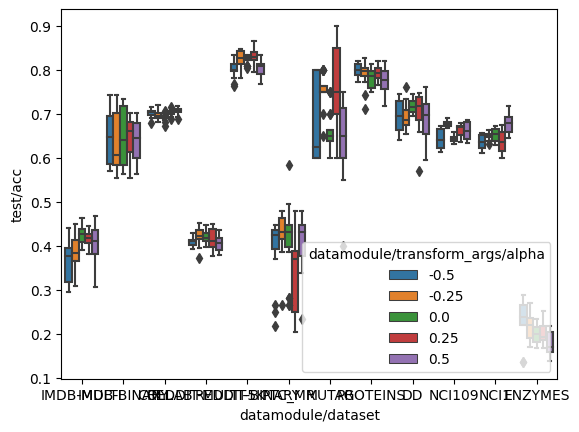

In [6]:
sns.boxplot(data=df, x="datamodule/dataset", y="test/acc", hue="datamodule/transform_args/alpha")


<AxesSubplot:xlabel='datamodule/transform_args/alpha', ylabel='test/acc'>

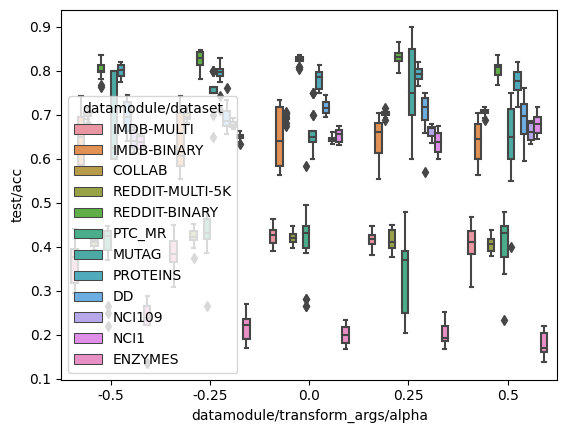

In [7]:
sns.boxplot(data=df, hue="datamodule/dataset", y="test/acc", x="datamodule/transform_args/alpha")

<AxesSubplot:xlabel='datamodule/transform_args/alpha', ylabel='test/acc'>

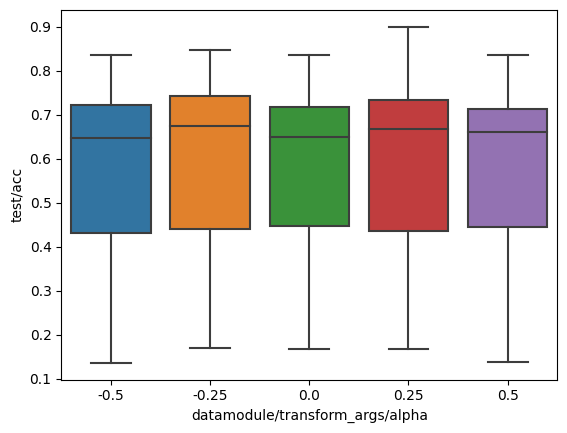

In [8]:
sns.boxplot(data=df, y="test/acc", x="datamodule/transform_args/alpha")

<AxesSubplot:xlabel='datamodule/transform_args/alpha', ylabel='test/acc'>

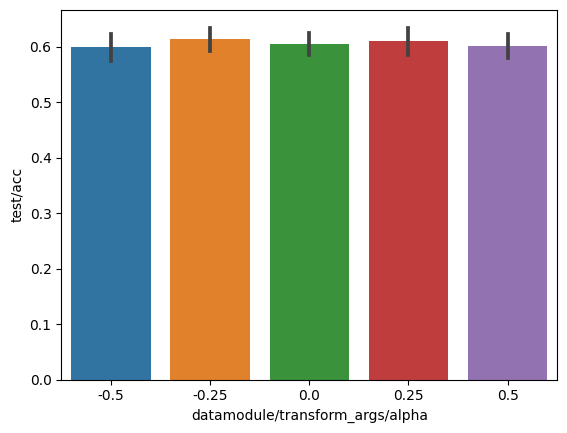

In [9]:
sns.barplot(data=df, y="test/acc", x="datamodule/transform_args/alpha")

<AxesSubplot:xlabel='datamodule/transform_args/alpha', ylabel='test/acc'>

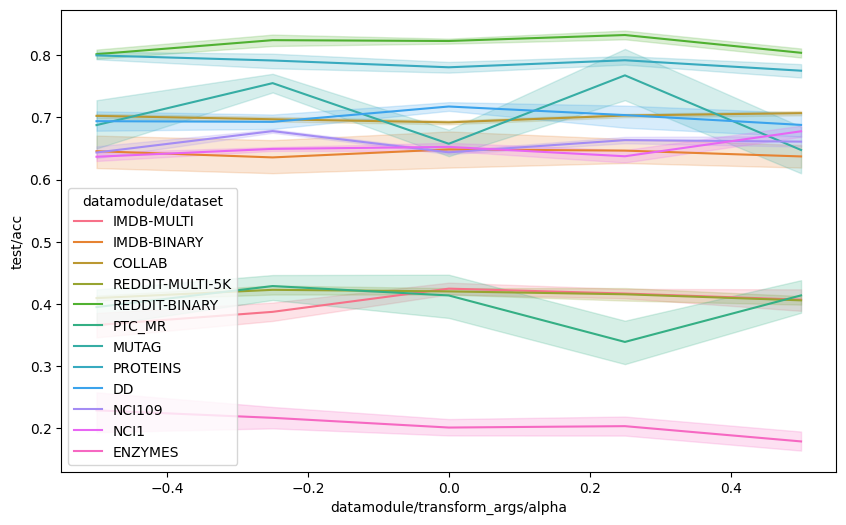

In [10]:
import matplotlib.pyplot as plt
plt.subplots(1,1,figsize=(10,6))
sns.lineplot(data=df, y="test/acc", x="datamodule/transform_args/alpha", hue="datamodule/dataset",)

In [11]:
df.groupby(["datamodule/transform_args/alpha", "datamodule/dataset", "datamodule/transform_args/power"]).mean()["test/acc"]

datamodule/transform_args/alpha  datamodule/dataset  datamodule/transform_args/power
-0.5                             COLLAB              1.0                                0.705664
                                                     2.0                                0.699023
                                 DD                  1.0                                0.727140
                                                     2.0                                0.660496
                                 ENZYMES             2.0                                0.228795
                                                                                          ...   
 0.5                             PTC_MR              2.0                                0.452604
                                 REDDIT-BINARY       1.0                                0.812500
                                                     2.0                                0.795089
                                 REDDIT-MU

In [12]:
def process_line(means, highlight_index, highlight_max):
    if highlight_max:
        tops = set(means.groupby(highlight_index).idxmax())
    else:
        tops = set(means.groupby(highlight_index).idxmin())
    def process_line(x):
        if x.name in tops:
            return rf"\textbf{{{x['mean']:0.3f} $\pm$ {x['std']:0.3f}}}"
        return rf"{x['mean']:0.3f} $\pm$ {x['std']:0.3f}"
    return process_line
def mean_pm_std(data, index, columns, value, highlight_cols=True, highlight_max=True):
    groupby = data.groupby([*index, *columns])
    means = groupby.mean()[value].rename("mean")
    stds = groupby.std()[value].rename("std")
    ddf = pd.concat([means, stds], axis=1)
    highlight_index = columns if highlight_cols else index
    ddf = ddf.T.apply(process_line(means, highlight_index, highlight_max))
    ddf = ddf.reset_index().pivot(index=index, columns=columns)
    ddf.columns = [col[1] for col in ddf.columns.values]
    return ddf
    #for i in range(len(means)):
        #means.iloc[i,:]
#mean_pm_std(df[df["datamodule/transform_args/power"] == 1].groupby(["datamodule/transform_args/alpha", "datamodule/dataset"]))

In [13]:
df

,Name,State,Notes,Tags,test/acc,datamodule/transform_args/alpha,datamodule/dataset,ckpt_path,model/net/hidden_dims,seed,datamodule/transform_args/power
0,cool-feather-1662,finished,-,"lr, power1, v6",0.367045,0.5,IMDB-MULTI,None,NaN,9,1.0
1,eager-voice-1661,finished,-,"lr, power1, v6",0.366477,0.5,IMDB-MULTI,None,NaN,8,1.0
2,proud-silence-1660,finished,-,"lr, power1, v6",0.409659,0.5,IMDB-MULTI,None,NaN,7,1.0
3,spring-firefly-1659,finished,-,"lr, power1, v6",0.397159,0.5,IMDB-MULTI,None,NaN,6,1.0
4,comic-paper-1658,finished,-,"lr, power1, v6",0.376136,0.5,IMDB-MULTI,None,NaN,5,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1145,blooming-river-513,finished,-,"lr, v5",0.652244,-0.5,NCI1,None,NaN,4,2.0
1146,dandy-darkness-512,finished,-,"lr, v5",0.657051,-0.5,NCI1,None,NaN,3,2.0
1147,drawn-snowflake-511,finished,-,"lr, v5",0.646991,-0.5,NCI1,None,NaN,2,2.0
1148,earthy-valley-510,finished,-,"lr, v5",0.652244,-0.5,NCI1,None,NaN,1,2.0


In [14]:
clean_df = df.rename(columns={"datamodule/transform_args/alpha": r"$\alpha$", "datamodule/transform_args/power": "power", "datamodule/dataset": "dataset","test/acc": "acc"})

In [15]:
results = mean_pm_std(clean_df, index=[r"$\alpha$", "power"], columns=["dataset"], value="acc").T
results

$\alpha$                     -0.50                              \
power                          1.0                         2.0   
COLLAB           0.706 $\pm$ 0.006           0.699 $\pm$ 0.009   
DD               0.727 $\pm$ 0.013           0.660 $\pm$ 0.014   
ENZYMES                        NaN  \textbf{0.229 $\pm$ 0.054}   
IMDB-BINARY      0.698 $\pm$ 0.026           0.588 $\pm$ 0.012   
IMDB-MULTI       0.397 $\pm$ 0.023           0.335 $\pm$ 0.043   
MUTAG            0.600 $\pm$ 0.000           0.775 $\pm$ 0.049   
NCI1             0.622 $\pm$ 0.006           0.651 $\pm$ 0.006   
NCI109           0.624 $\pm$ 0.010           0.663 $\pm$ 0.010   
PROTEINS         0.798 $\pm$ 0.013  \textbf{0.802 $\pm$ 0.016}   
PTC_MR           0.423 $\pm$ 0.056           0.366 $\pm$ 0.072   
REDDIT-BINARY    0.789 $\pm$ 0.014           0.814 $\pm$ 0.011   
REDDIT-MULTI-5K  0.403 $\pm$ 0.007           0.416 $\pm$ 0.007   

$\alpha$                              -0.25                              \
power                                   1.0                         2.0   
COLLAB                    0.701 $\pm$ 0.010           0.693 $\pm$ 0.007   
DD                        0.711 $\pm$ 0.026           0.674 $\pm$ 0.011   
ENZYMES                                 NaN           0.217 $\pm$ 0.031   
IMDB-BINARY               0.692 $\pm$ 0.038           0.579 $\pm$ 0.017   
IMDB-MULTI                0.373 $\pm$ 0.014           0.401 $\pm$ 0.045   
MUTAG                     0.770 $\pm$ 0.026           0.740 $\pm$ 0.039   
NCI1                      0.650 $\pm$ 0.004           0.649 $\pm$ 0.009   
NCI109                    0.676 $\pm$ 0.004  \textbf{0.680 $\pm$ 0.008}   
PROTEINS                  0.791 $\pm$ 0.009           0.791 $\pm$ 0.038   
PTC_MR           \textbf{0.456 $\pm$ 0.020}           0.402 $\pm$ 0.051   
REDDIT-BINARY             0.808 $\pm$ 0.017           0.841 $\pm$ 0.007   
REDDIT-MULTI-5K           0.410 $\pm$ 0.016  \textbf{0.435 $\pm$ 0.009}   

$\alpha$                               0.00                              \
power                                   1.0                         2.0   
COLLAB                    0.690 $\pm$ 0.007           0.694 $\pm$ 0.007   
DD                        0.714 $\pm$ 0.015           0.720 $\pm$ 0.017   
ENZYMES                                 NaN           0.201 $\pm$ 0.023   
IMDB-BINARY      \textbf{0.713 $\pm$ 0.021}           0.584 $\pm$ 0.019   
IMDB-MULTI                0.421 $\pm$ 0.027  \textbf{0.428 $\pm$ 0.016}   
MUTAG                     0.675 $\pm$ 0.063           0.640 $\pm$ 0.021   
NCI1                      0.638 $\pm$ 0.006           0.667 $\pm$ 0.004   
NCI109                    0.641 $\pm$ 0.004           0.647 $\pm$ 0.008   
PROTEINS                  0.778 $\pm$ 0.024           0.783 $\pm$ 0.017   
PTC_MR                    0.384 $\pm$ 0.097           0.443 $\pm$ 0.054   
REDDIT-BINARY             0.820 $\pm$ 0.009           0.825 $\pm$ 0.009   
REDDIT-MULTI-5K           0.419 $\pm$ 0.011           0.421 $\pm$ 0.014   

$\alpha$                               0.25                              \
power                                   1.0                         2.0   
COLLAB                    0.705 $\pm$ 0.005           0.700 $\pm$ 0.007   
DD                        0.675 $\pm$ 0.041  \textbf{0.732 $\pm$ 0.011}   
ENZYMES                                 NaN           0.203 $\pm$ 0.027   
IMDB-BINARY               0.684 $\pm$ 0.015           0.609 $\pm$ 0.032   
IMDB-MULTI                0.406 $\pm$ 0.016           0.427 $\pm$ 0.013   
MUTAG                     0.690 $\pm$ 0.052  \textbf{0.845 $\pm$ 0.064}   
NCI1                      0.617 $\pm$ 0.011           0.658 $\pm$ 0.010   
NCI109                    0.673 $\pm$ 0.004           0.654 $\pm$ 0.010   
PROTEINS                  0.787 $\pm$ 0.012           0.796 $\pm$ 0.019   
PTC_MR                    0.298 $\pm$ 0.102           0.379 $\pm$ 0.022   
REDDIT-BINARY    \textbf{0.842 $\pm$ 0.014}           0.822 $\pm$ 0.013  

In [16]:
r2 = clean_df.groupby([r"$\alpha$", "power", "dataset"]).mean()["acc"].reset_index().pivot(index=[r"$\alpha$", "power", ], columns=["dataset"]).T
r2

$\alpha$                -0.50               -0.25                0.00  \
power                     1.0       2.0       1.0       2.0       1.0   
    dataset                                                             
acc COLLAB           0.705664  0.699023  0.700625  0.693164  0.689531   
    DD               0.727140  0.660496  0.711243  0.674287  0.713995   
    ENZYMES               NaN  0.228795       NaN  0.216741       NaN   
    IMDB-BINARY      0.697656  0.587674  0.692187  0.578906  0.713281   
    IMDB-MULTI       0.397102  0.335000  0.373466  0.400909  0.420739   
    MUTAG            0.600000  0.775000  0.770000  0.740000  0.675000   
    NCI1             0.622302  0.650908  0.649769  0.648673  0.638070   
    NCI109           0.624022  0.662853  0.675721  0.679920  0.640625   
    PROTEINS         0.797656  0.801562  0.791406  0.791406  0.778125   
    PTC_MR           0.423438  0.366146  0.455729  0.401563  0.384375   
    REDDIT-BINARY    0.788839  0.814286  0.807589  0.840625  0.820089   
    REDDIT-MULTI-5K  0.402799  0.415811  0.410259  0.434942  0.419448   

$\alpha$                           0.25                0.50            
power                     2.0       1.0       2.0       1.0       2.0  
    dataset                                                            
acc COLLAB           0.694258  0.705469  0.700391  0.708203  0.705273  
    DD               0.720482  0.675408  0.731827  0.651291  0.724355  
    ENZYMES          0.201116       NaN  0.203348       NaN  0.178795  
    IMDB-BINARY      0.583594  0.684375  0.608594  0.666406  0.607812  
    IMDB-MULTI       0.428239  0.405795  0.427443  0.394602  0.418864  
    MUTAG            0.640000  0.690000  0.845000  0.705000  0.590000  
    NCI1             0.666836  0.616702  0.658084  0.696261  0.658868  
    NCI109           0.646811  0.672724  0.653974  0.679391  0.642484  
    PROTEINS         0.782813  0.787500  0.796094  0.756250  0.793750  
    PTC_MR           0.442708  0.298438  0.379167  0.370370  0.452604  
    REDDIT-BINARY    0.825446  0.842411  0.822321  0.812500  0.795089  
    REDDIT-MULTI-5K  0.420666  0.433389  0.397526  0.420089  0.391276

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IMDB-MULTI'),
  Text(1, 0, 'IMDB-BINARY'),
  Text(2, 0, 'COLLAB'),
  Text(3, 0, 'REDDIT-MULTI-5K'),
  Text(4, 0, 'REDDIT-BINARY'),
  Text(5, 0, 'PTC_MR'),
  Text(6, 0, 'MUTAG'),
  Text(7, 0, 'PROTEINS'),
  Text(8, 0, 'DD'),
  Text(9, 0, 'NCI109'),
  Text(10, 0, 'NCI1'),
  Text(11, 0, 'ENZYMES')])

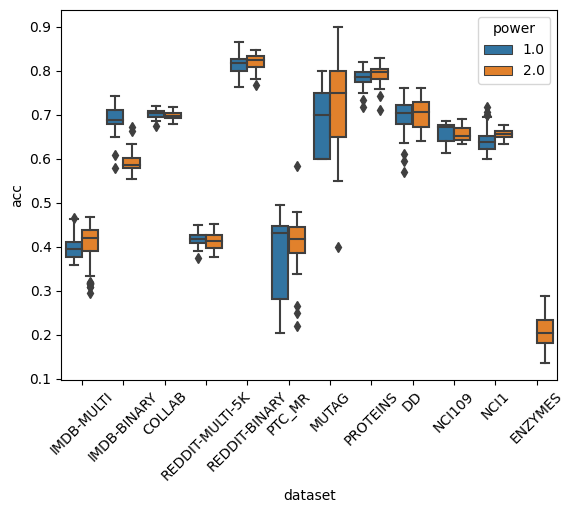

In [17]:
sns.boxplot(data=clean_df, x="dataset", y="acc", hue="power")
plt.xticks(rotation=45)

(array([0]), [Text(0, 0, 'IMDB-BINARY')])

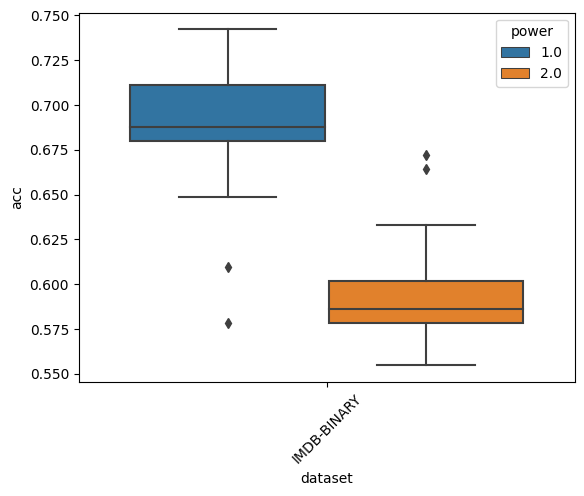

In [21]:
sns.boxplot(data=clean_df[clean_df["dataset"] == "IMDB-BINARY"], x="dataset", y="acc", hue="power")
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IMDB-MULTI'),
  Text(1, 0, 'IMDB-BINARY'),
  Text(2, 0, 'COLLAB'),
  Text(3, 0, 'REDDIT-MULTI-5K'),
  Text(4, 0, 'REDDIT-BINARY'),
  Text(5, 0, 'PTC_MR'),
  Text(6, 0, 'MUTAG'),
  Text(7, 0, 'PROTEINS'),
  Text(8, 0, 'DD'),
  Text(9, 0, 'NCI109'),
  Text(10, 0, 'NCI1'),
  Text(11, 0, 'ENZYMES')])

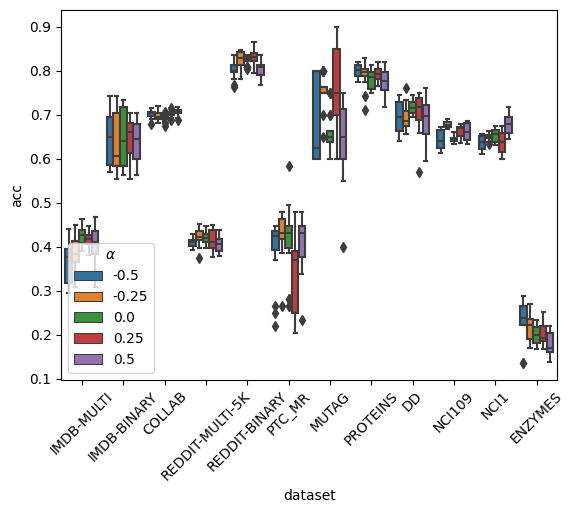

In [18]:
sns.boxplot(data=clean_df, x="dataset", y="acc", hue=r"$\alpha$")
plt.xticks(rotation=45)

<AxesSubplot:xlabel='$\\alpha$-power', ylabel='None-dataset'>

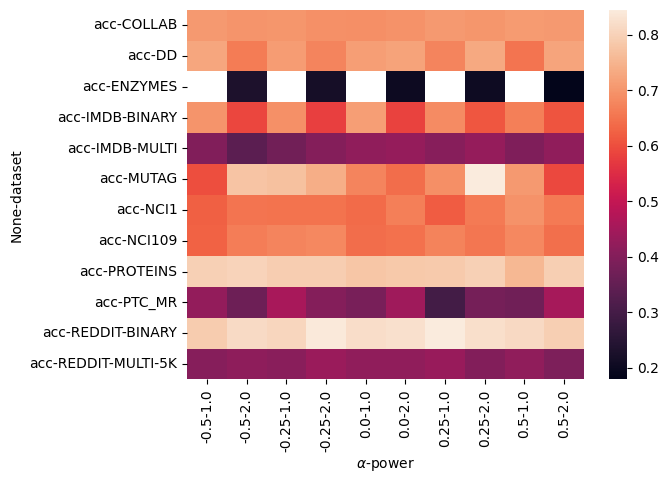

In [19]:
sns.heatmap(r2)

In [20]:
results.

SyntaxError: invalid syntax (3562696729.py, line 1)

In [ ]:
print(mean_pm_std(df, index=["datamodule/transform_args/alpha", "datamodule/transform_args/power"], columns=[ "datamodule/dataset"], value="test/acc").T.style.to_latex())

In [ ]:
df.groupby(["datamodule/transform_args/alpha", "datamodule/dataset"]).mean()["test/acc"].reset_index().pivot(index="datamodule/dataset", columns="datamodule/transform_args/alpha")


In [ ]:
df.groupby(["datamodule/transform_args/alpha"]).mean()["test/acc"].sort_values()

In [ ]:
df.groupby(["datamodule/transform_args/alpha", "datamodule/dataset"]).mean()["test/acc"].groupby("datamodule/dataset").idxmax().apply(lambda x: x[0]).value_counts()